In [48]:
import numpy as np
import pandas as pd


In [49]:
df=pd.read_excel('ai_job_market_insights.xlsx')


In [50]:
df_array=np.array(df)

In [51]:
df_1D = np.array(df.iloc[0])

In [52]:
df_2D = np.array(df.iloc[0:5])

In [53]:
df_3D = np.array(df.iloc[0:,5])

In [54]:
df1 = pd.DataFrame([df.iloc[1].values], index=range(1, 5),columns=df.columns)
# df.iloc[0].values
df1

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
3,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
4,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline


In [55]:
df.columns

Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD',
       'Remote_Friendly', 'Job_Growth_Projection'],
      dtype='object')

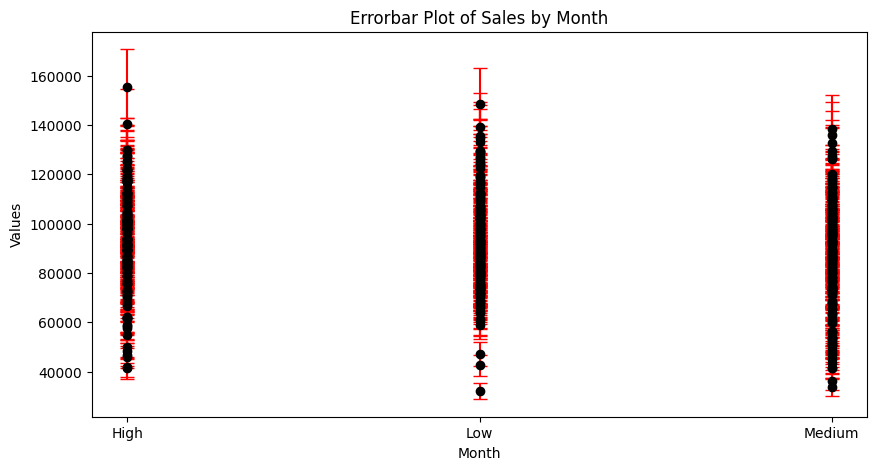

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.errorbar(df['Automation_Risk'], df['Salary_USD'], yerr=df['Salary_USD']*10/100, fmt='o', color='black', ecolor='red', capsize=5)
plt.xlabel("Month")
plt.ylabel("Values")
plt.title("Errorbar Plot of Sales by Month")
plt.show()

In [57]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [58]:
df.tail()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable
499,HR Manager,Entertainment,Medium,Berlin,Medium,High,Project Management,68764.378921,Yes,Decline


In [59]:
df.describe()

,Salary_USD
count,500.000000
mean,91222.390974
std,20504.291453
min,31969.526346
25%,78511.514863
50%,91998.195286
75%,103971.282092
max,155209.821614


<Axes: xlabel='Company_Size', ylabel='count'>

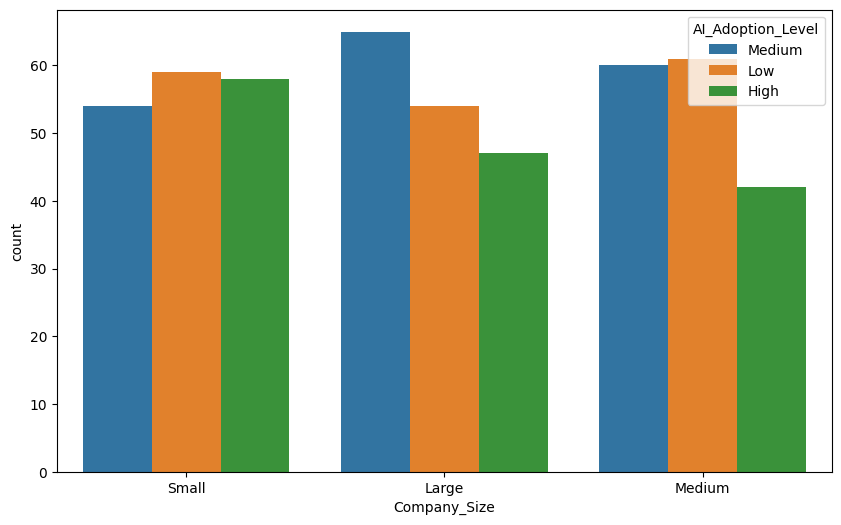

In [60]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(x=df['Company_Size'],data=df,hue=df['AI_Adoption_Level'],width=0.8)

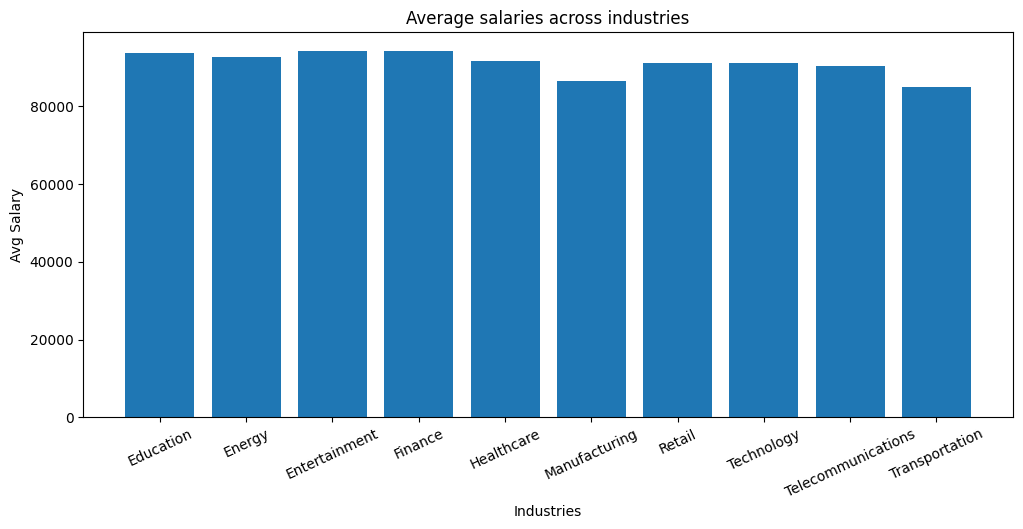

In [61]:
#Use a bar plot to compare average salaries across industries.
df_avgsal_per_industries = df.groupby('Industry')[['Salary_USD']].mean()

plt.figure(figsize=(12,5))
plt.bar(df_avgsal_per_industries.index,df_avgsal_per_industries['Salary_USD'])
plt.xlabel("Industries")
plt.xticks(rotation=25)
plt.ylabel("Avg Salary")
plt.title("Average salaries across industries")
plt.show()

<Axes: xlabel='Automation_Risk', ylabel='AI_Adoption_Level'>

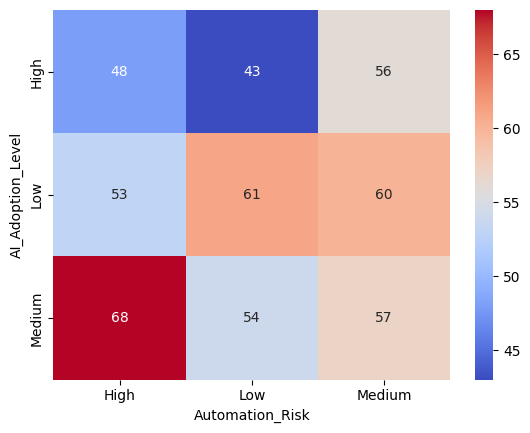

In [62]:
#Use a heatmap to observe the relationship between AI adoption levels and automation risks.
df_ai_adoption_vs_automation_risk = df.pivot_table(
    index='AI_Adoption_Level',
    columns='Automation_Risk',
    aggfunc='size' 
)

sns.heatmap(df_ai_adoption_vs_automation_risk, cmap='coolwarm', annot=True, fmt='d')


In [63]:
df_remote_friendly=df.groupby('Remote_Friendly')['Location'].value_counts()
df_remote_friendly

df['Remote_Friendly'].value_counts()

Remote_Friendly
Yes    251
No     249
Name: count, dtype: int64

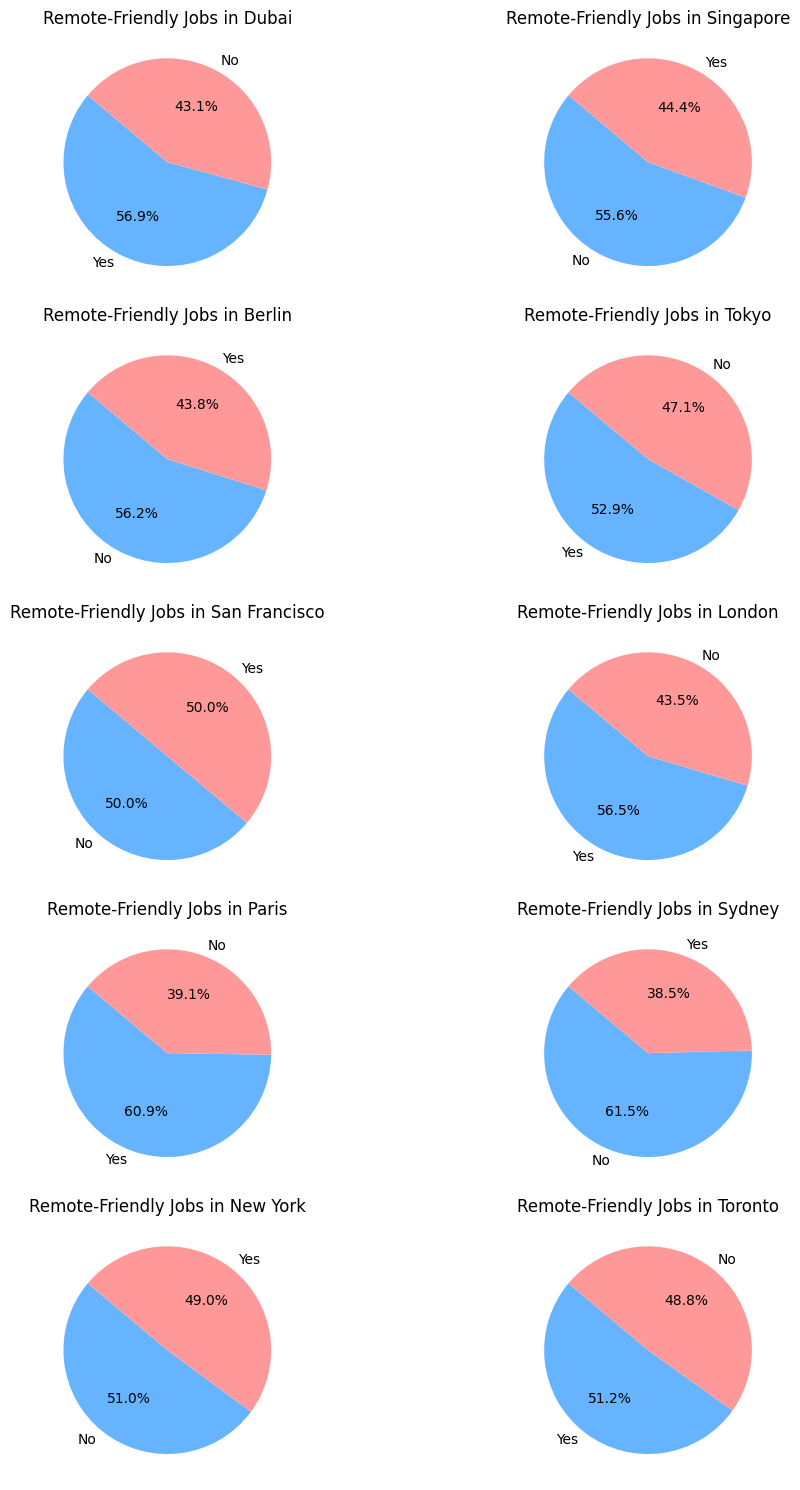

In [ ]:
#Use a pie chart to show the proportion of remote-friendly jobs by location, display all yes and no for all location.
import pandas as pd
import matplotlib.pyplot as plt

# Example data (same structure as in the question)
data = {
    'Location': np.array(df['Location']),
    'Remote_Friendly': np.array(df['Remote_Friendly'])
}

# Create a DataFrame
df1 = pd.DataFrame(data)

# Step 1: Set up the plot
locations = df1['Location'].unique()  # Get unique locations
fig, axes = plt.subplots(5, 2, figsize=(12, 15))  # Adjust rows and columns based on number of locations

# Flatten the axes for easy iteration
axes = axes.flatten()

# Step 2: Create a pie chart for each location
for idx, location in enumerate(locations):
    # Count the occurrences of 'Yes' and 'No' for remote-friendly jobs at each location
    location_data = df1[df1['Location'] == location]['Remote_Friendly'].value_counts()
    # Plot pie chart for each location
    axes[idx].pie(location_data, labels=location_data.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
    axes[idx].set_title(f'Remote-Friendly Jobs in {location}')

# Adjust layout
plt.tight_layout()
plt.show()

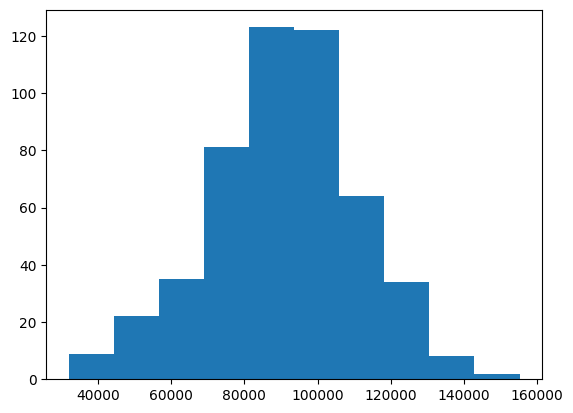

In [72]:
#Use a histogram to visualize the distribution of salaries.

plt.hist(df['Salary_USD'])
plt.show()

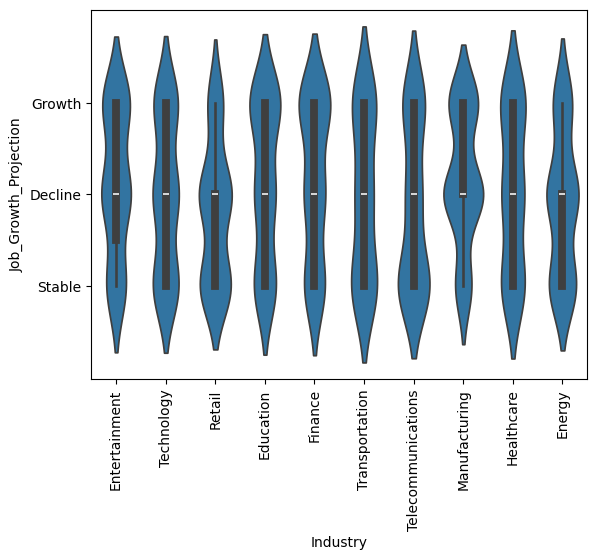

In [73]:
#Use a violin plot to display the distribution of job growth projections by industry
sns.violinplot(x='Industry', y='Job_Growth_Projection', data=df)
plt.xticks(rotation=90)
plt.show()

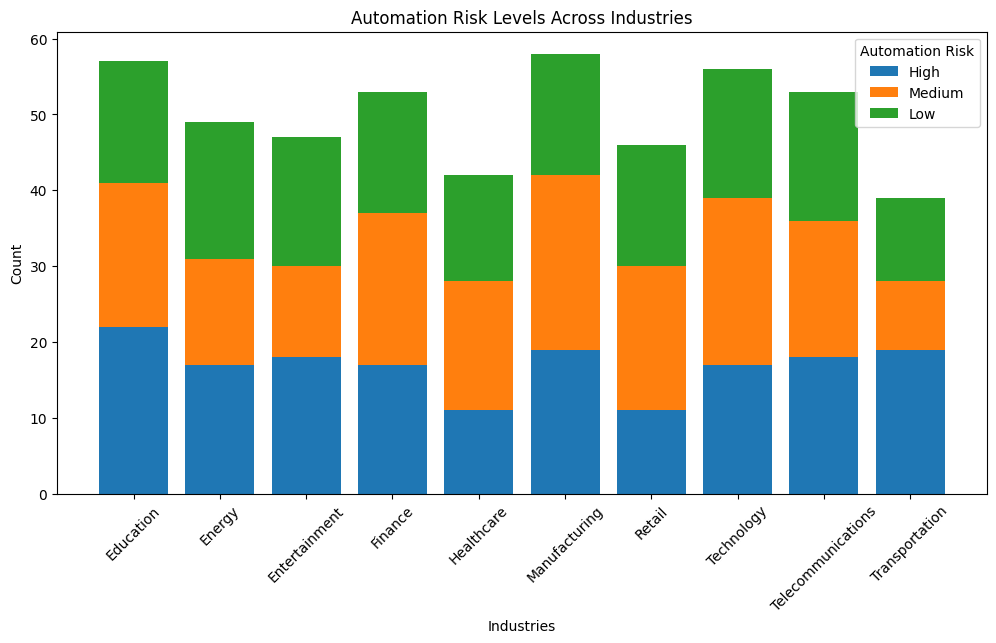

In [86]:
#Use a stacked bar plot to compare automation risk levels across industries.

df_automation_risk_per_industry = df.groupby('Industry')['Automation_Risk'].value_counts().unstack().fillna(0)

plt.figure(figsize=(12, 6))
# Plot the stacked bar chart
plt.bar(df_automation_risk_per_industry.index, df_automation_risk_per_industry['High'], label='High')
plt.bar(df_automation_risk_per_industry.index, 
        df_automation_risk_per_industry['Medium'], 
        bottom=df_automation_risk_per_industry['High'], 
        label='Medium')
plt.bar(df_automation_risk_per_industry.index, 
        df_automation_risk_per_industry['Low'], 
        bottom=df_automation_risk_per_industry['High'] + df_automation_risk_per_industry['Medium'], 
        label='Low')

# Add labels and title
plt.xlabel("Industries")
plt.ylabel("Count")
plt.title("Automation Risk Levels Across Industries")
plt.xticks(rotation=45)
plt.legend(title='Automation Risk')

# Display the chart
plt.show()


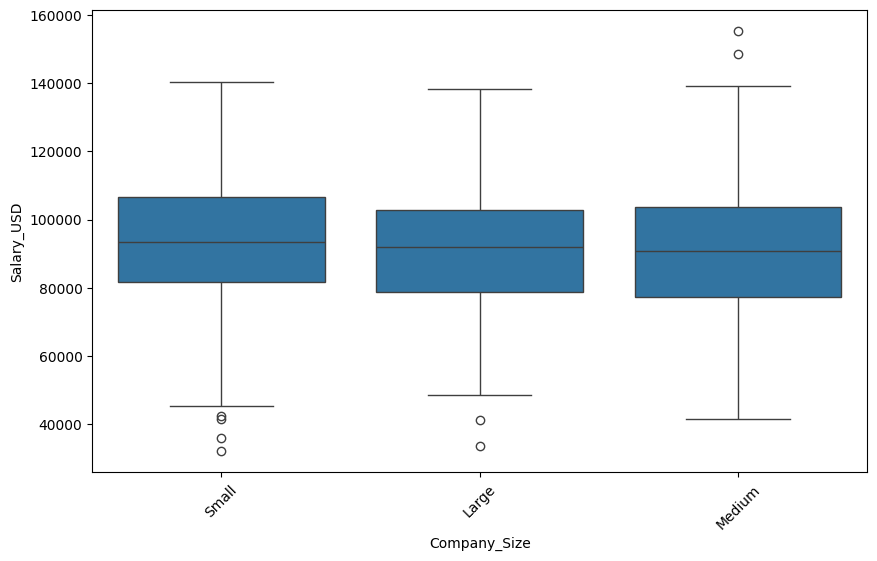

In [92]:
#Use a box plot to compare salaries across company sizes.
plt.figure(figsize=(10,6))
sns.boxplot(x='Company_Size', y='Salary_USD', data=df)
plt.xticks(rotation=45)
plt.show()


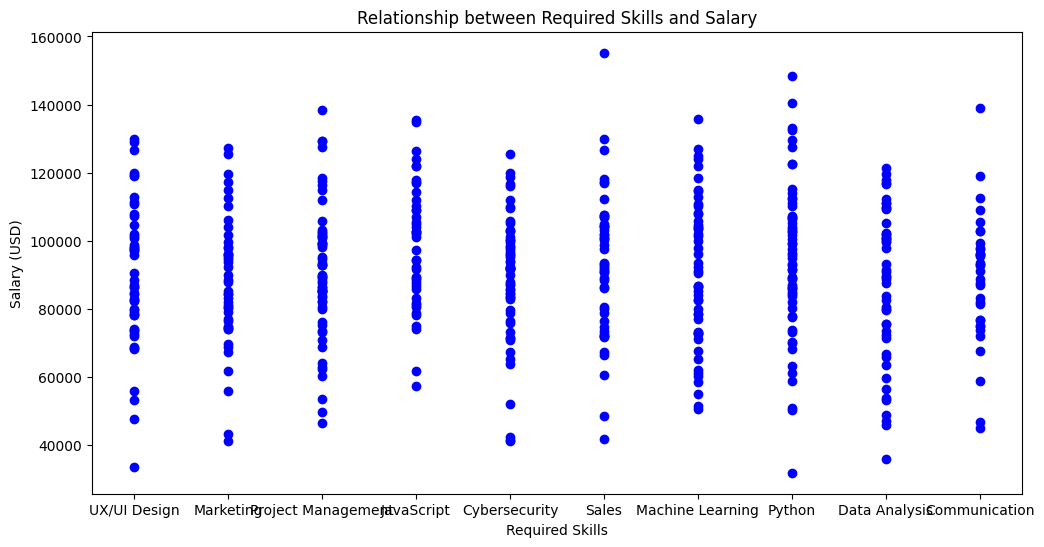

In [93]:
#Use a scatter plot to explore the relationship between required skills and salaries.
plt.figure(figsize=(12,6))
plt.scatter(df['Required_Skills'], df['Salary_USD'], color='blue')
plt.xlabel('Required Skills')
plt.ylabel('Salary (USD)')
plt.title('Relationship between Required Skills and Salary')
plt.show()

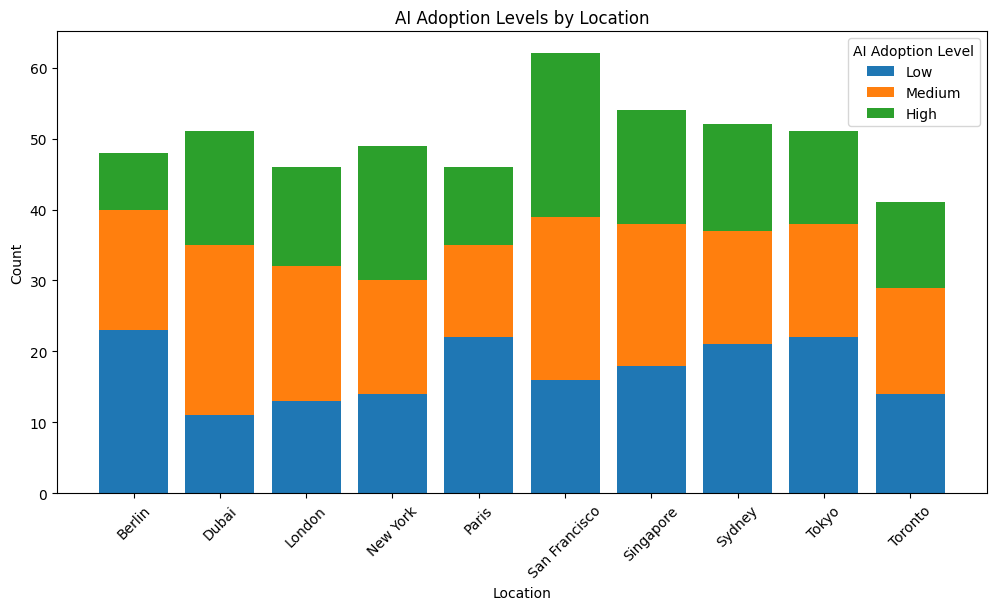

In [ ]:
#Use a grouped bar plot to compare AI adoption levels by location.
df_ai_adoption_per_location = df.groupby('Location')['AI_Adoption_Level'].value_counts().unstack().fillna(0)

plt.figure(figsize=(12, 6))
# Plot the grouped bar chart
plt.bar(df_ai_adoption_per_location.index, df_ai_adoption_per_location['Low'], label='Low')
plt.bar(df_ai_adoption_per_location.index,
        df_ai_adoption_per_location['Medium'],
        bottom=df_ai_adoption_per_location['Low'],
        label='Medium')
plt.bar(df_ai_adoption_per_location.index, 
        df_ai_adoption_per_location['High'], 
        bottom=df_ai_adoption_per_location['Low'] + df_ai_adoption_per_location['Medium'], 
        label='High')

# Add labels and title
plt.xlabel("Location")
plt.ylabel("Count")
plt.title("AI Adoption Levels by Location")
plt.xticks(rotation=45)
plt.legend(title='AI Adoption Level')

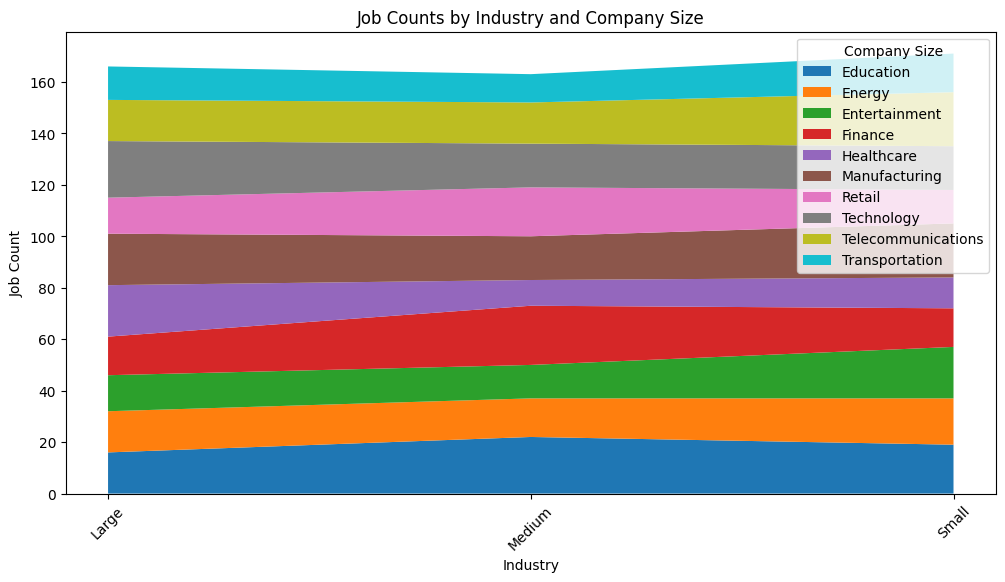

In [102]:
#Use a stacked area chart to compare job counts by industry and company size.

df_job_counts = df.groupby(['Company_Size','Industry']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
plt.stackplot(df_job_counts.index, df_job_counts.values.T, labels=df_job_counts.columns)
plt.xlabel("Industry")
plt.ylabel("Job Count")
plt.title("Job Counts by Industry and Company Size")
plt.xticks(rotation=45)
plt.legend(title='Company Size')
plt.show()